In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

Best lambda = 0.0046 | Mean accuracy = 0.8500


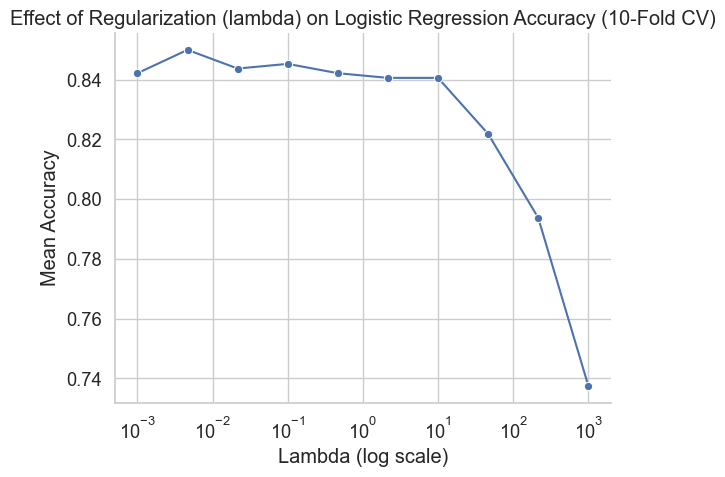

In [5]:
# Logistic Regression: effect of regularization strength (lambda)

# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of lambda values (regularization strength) to test
# Note: C = 1 / lambda in scikit-learn
lambdas = np.logspace(-3, 3, 10)

results = []

for lam in lambdas:
    C_val = 1 / lam
    model = make_pipeline(
        CountVectorizer(),
        LogisticRegression(
            C=C_val,
            solver="liblinear", # apparently good for small datasets, which I think ours is.
            max_iter=1000,
            random_state=42
        )
    )
    scores = cross_val_score(model, df["text"], df["label"], cv=kf, scoring="accuracy")
    results.append({"lambda": lam, "mean_accuracy": scores.mean()})

# Convert to DataFrame
df_results_lr = pd.DataFrame(results)

# Plot
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results_lr,
    x="lambda",
    y="mean_accuracy",
    marker="o"
)
ax.set_xscale("log")
ax.set_title("Effect of Regularization (lambda) on Logistic Regression Accuracy (10-Fold CV)")
ax.set_xlabel("Lambda (log scale)")
ax.set_ylabel("Mean Accuracy")
sns.despine()

# Print best lambda
best_row = df_results_lr.loc[df_results_lr["mean_accuracy"].idxmax()]
print(f"Best lambda = {best_row['lambda']:.4f} | Mean accuracy = {best_row['mean_accuracy']:.4f}")